<a href="https://colab.research.google.com/github/MarialuizaLeao/NotebooksIC/blob/master/metrics_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


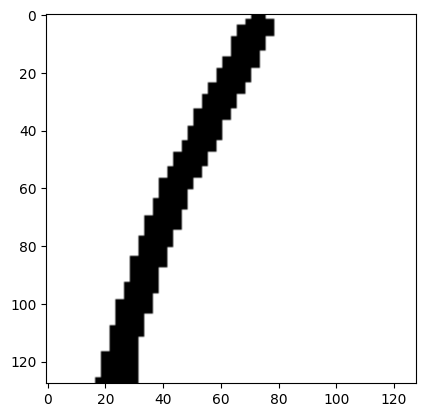

In [ ]:
fal = np.load('/content/drive/MyDrive/GODeep/malu/metrics/falha.npy')
plt.imshow(fal, cmap = 'binary')

(128, 128)


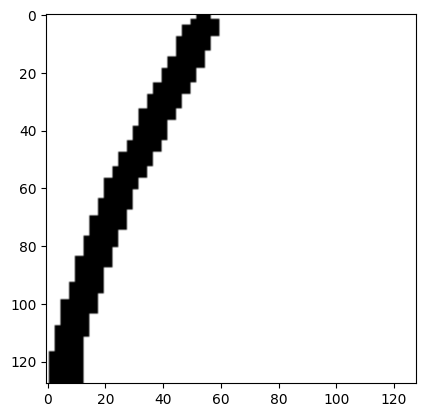

In [ ]:
fal_dislocated = np.delete(fal, [i for i in range(1,20)], axis = 1)
zeros = np.zeros(shape=(128,19))

fal_dislocated = np.concatenate((fal_dislocated, zeros), axis = 1)
print(fal_dislocated.shape)

plt.imshow(fal_dislocated, cmap = 'binary')

(128, 128)


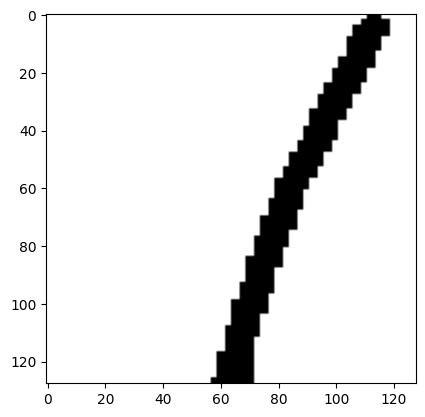

In [ ]:
fal_dislocated2 = np.delete(fal, [i for i in range(80,120)], axis = 1)


zeros = np.zeros(shape=(128,40))

fal_dislocated2 = np.concatenate((zeros, fal_dislocated2), axis = 1)
print(fal_dislocated.shape)

plt.imshow(fal_dislocated2, cmap = 'binary')

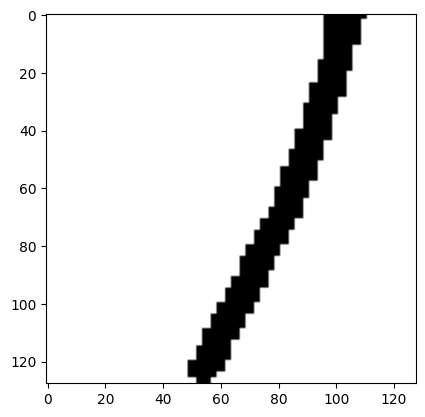

In [ ]:
fal_flip = np.flip(fal)

plt.imshow(fal_flip, cmap = 'binary')

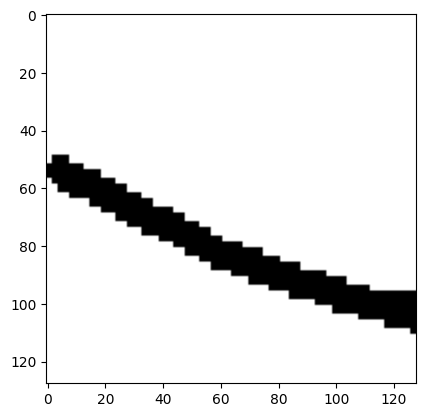

In [ ]:
fal_rot = np.rot90(fal)

plt.imshow(fal_rot, cmap = 'binary')

Text(0.5, 1.0, 'Zeros')

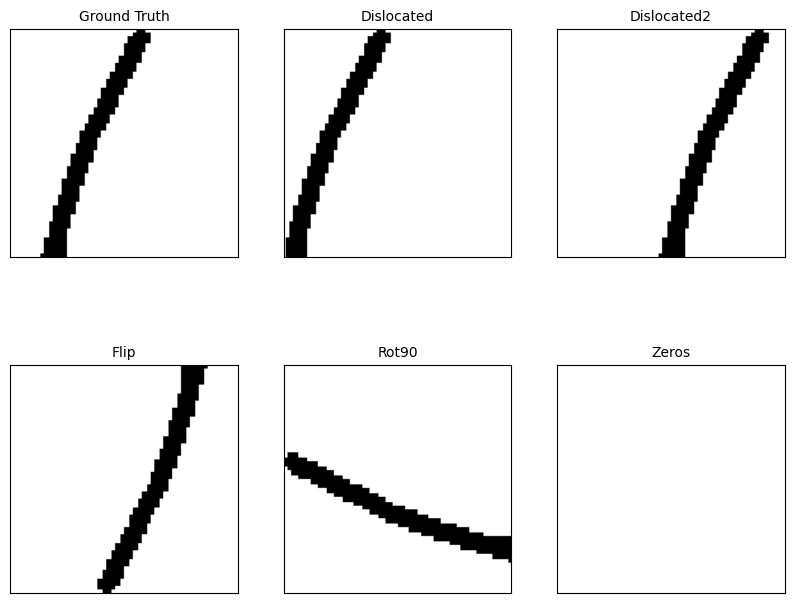

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10,8) )

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].imshow(fal, cmap = 'binary')
ax[0,0].set_title('Ground Truth', fontsize = 10)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].imshow(fal_dislocated, cmap = 'binary')
ax[0,1].set_title('Dislocated', fontsize = 10)

ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[0,2].imshow(fal_dislocated2, cmap = 'binary')
ax[0,2].set_title('Dislocated2', fontsize = 10)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,0].imshow(fal_flip, cmap = 'binary')
ax[1,0].set_title('Flip', fontsize = 10)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].imshow(fal_rot, cmap = 'binary')
ax[1,1].set_title('Rot90', fontsize = 10)


ax[1,2].set_xticks([])
ax[1,2].set_yticks([])
ax[1,2].imshow(np.zeros(shape=(128,128)), cmap = 'binary')
ax[1,2].set_title('Zeros', fontsize = 10)

In [ ]:
def normalize(arr):
    if not np.any(arr): ### check whether it is a full 0's array
        return arr
    else:
        return (arr-np.min(arr))/(np.max(arr)-np.min(arr))

In [ ]:
images = [fal_dislocated, fal_dislocated2, fal_flip, fal_rot, np.zeros(shape=(128,128))]

In [ ]:
from skimage.metrics import hausdorff_distance
from sklearn.metrics import precision_score, recall_score
from skimage.filters import gaussian


def metrics(target, predicted):
    distance = hausdorff_distance(target, predicted)

    P = precision_score(target, predicted, average = None, zero_division = 1).sum(axis=0)/128
    R = recall_score(target, predicted, average = None, zero_division = 1).sum(axis=0)/128
    IOU = 1/(1/P + 1/R - 1)

    j = 10
    target_gauss = normalize(gaussian(target, sigma = j))
    predicted_gauss = normalize(gaussian(predicted, sigma = j))
    ref = (target_gauss*target_gauss).sum(axis=(0,1))/(target.shape[0]*target.shape[1])

    gaussian_metric = (target_gauss*predicted_gauss).sum(axis=(0,1))/(target.shape[0]*target.shape[1])/ref


    return distance, IOU, gaussian_metric


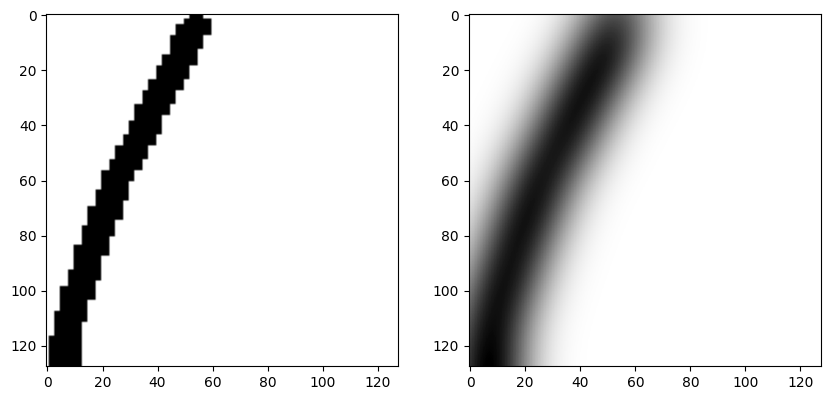

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(10,5))

ax[0].imshow(images[0], cmap = 'binary')
ax[1].imshow(gaussian(images[0], sigma = 10), cmap = 'binary')

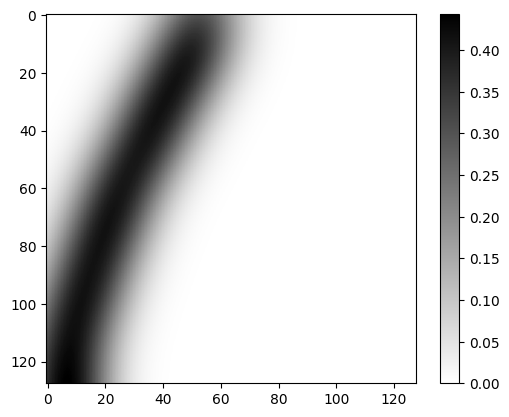

In [ ]:
plt.imshow(gaussian(images[0], sigma = 10), cmap = 'binary')
plt.colorbar()

In [ ]:
gaussian(images[0], sigma = 10)*gaussian(fal, sigma = 10)

0.0

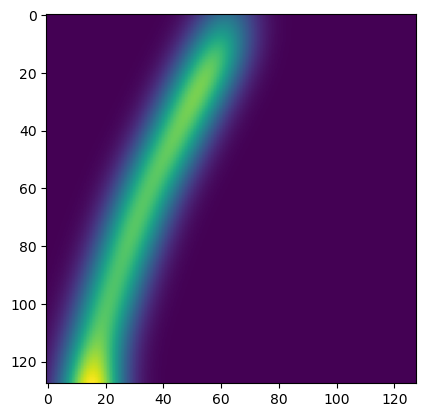

In [ ]:
plt.imshow(gaussian(images[0], sigma = 10)*gaussian(fal, sigma = 10))

In [ ]:
images = [fal_dislocated, fal_dislocated2, fal_flip, fal_rot, np.zeros(shape=(128,128))]


for im in images:
    result = metrics(fal, im)
    s = 'Hausdorff Distance = {:.2f}, IOU = {:.4f}, Gaussian Metric = {:.4f}'.format(result[0], result[1], result[2])
    print(s)

Hausdorff Distance = 19.00, IOU = 0.3579, Gaussian Metric = 0.5548
Hausdorff Distance = 40.00, IOU = 0.3474, Gaussian Metric = 0.0435
Hausdorff Distance = 37.59, IOU = 0.3474, Gaussian Metric = 0.0820
Hausdorff Distance = 88.64, IOU = 0.0742, Gaussian Metric = 0.2676
Hausdorff Distance = inf, IOU = 0.5156, Gaussian Metric = 0.0000


Text(0.5, 1.0, 'Zeros')

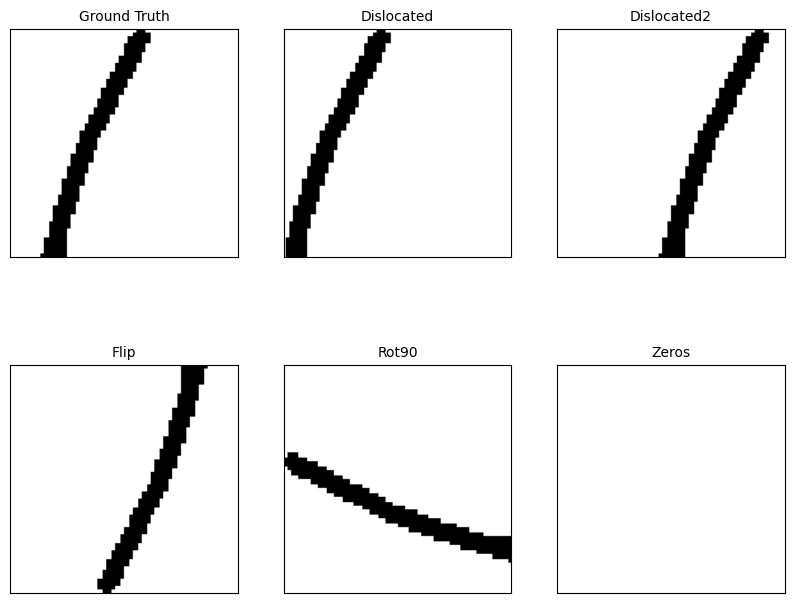

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10,8) )

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].imshow(fal, cmap = 'binary')
ax[0,0].set_title('Ground Truth', fontsize = 10)

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].imshow(fal_dislocated, cmap = 'binary')
ax[0,1].set_title('Dislocated', fontsize = 10)

ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[0,2].imshow(fal_dislocated2, cmap = 'binary')
ax[0,2].set_title('Dislocated2', fontsize = 10)

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,0].imshow(fal_flip, cmap = 'binary')
ax[1,0].set_title('Flip', fontsize = 10)

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].imshow(fal_rot, cmap = 'binary')
ax[1,1].set_title('Rot90', fontsize = 10)


ax[1,2].set_xticks([])
ax[1,2].set_yticks([])
ax[1,2].imshow(np.zeros(shape=(128,128)), cmap = 'binary')
ax[1,2].set_title('Zeros', fontsize = 10)

(128, 128)


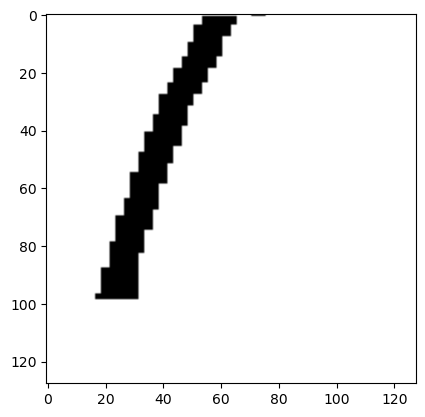

In [ ]:
teste = np.delete(fal, [i for i in range(1,30)], axis = 0)
zeros = np.zeros(shape=(29,128))

teste = np.concatenate((teste, zeros), axis = 0)
print(teste.shape)

plt.imshow(teste, cmap = 'binary')

In [ ]:
metrics(fal, teste)

(29.0, 0.4120752341814827, 0.7055128368187565)